In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("Bank_train1.csv",sep=',')
df

,Unnamed: 0,age,marital,education,default,balance,housing,loan,contact,day,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,duration_std
0,0,30,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,0,0,0,1,0,-0.711861
1,1,33,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,0,0,1,0,0,0,0,-0.169194
2,2,35,single,tertiary,no,1350,yes,no,cellular,16,...,0,1,0,0,0,0,0,0,0,-0.303898
3,3,30,married,tertiary,no,1476,yes,yes,unknown,3,...,0,1,0,0,0,0,0,0,0,-0.250017
4,4,59,married,secondary,no,0,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,-0.146102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,33,married,secondary,no,-333,yes,no,cellular,30,...,0,0,0,0,1,0,0,0,0,0.250315
4517,4517,57,married,tertiary,yes,-3313,yes,yes,unknown,9,...,0,0,0,1,0,0,0,0,0,-0.427057
4518,4518,57,married,secondary,no,295,no,no,cellular,19,...,0,0,0,0,0,0,1,0,0,-0.434754
4519,4519,28,married,secondary,no,1137,no,no,cellular,6,...,0,0,0,0,0,0,0,0,0,-0.519426


## STEP 3: Convert ALL CATEGORICAL COLUMNS to NUMERIC

In [3]:
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

print(df.dtypes)


Unnamed: 0             int64
age                    int64
marital                int32
education              int32
default                int32
balance                int64
housing                int32
loan                   int32
contact                int32
day                    int64
month                  int32
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome               int32
y                      int32
job_blue-collar        int64
job_entrepreneur       int64
job_housemaid          int64
job_management         int64
job_retired            int64
job_self-employed      int64
job_services           int64
job_student            int64
job_technician         int64
job_unemployed         int64
job_unknown            int64
duration_std         float64
dtype: object


## STEP 4: Split Features and Target

In [4]:
X = df.drop('y', axis=1)
y = df['y']


## STEP 5: Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## STEP 6: Feature Scaling

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## STEP 7: Train the Model

In [7]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

print("Model training completed successfully")


Model training completed successfully


## STEP 8: Predictions

In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Predictions generated")


Predictions generated


## STEP 9: Model Evaluation (Metrics)

In [9]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.8891039823008849
Testing Accuracy: 0.8950276243093923

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.54      0.20      0.30        98

    accuracy                           0.90       905
   macro avg       0.73      0.59      0.62       905
weighted avg       0.87      0.90      0.87       905



## STEP 10: Create Confusion metrix

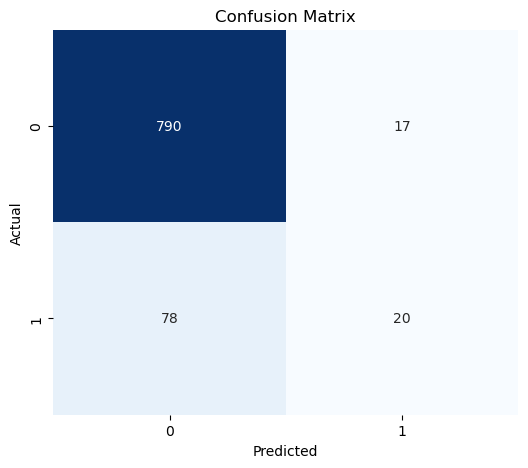

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## STEP 11: Overfitting / Underfitting Check

In [11]:
if train_accuracy - test_accuracy > 0.05:
    print("Model is OVERFITTING")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("Model is UNDERFITTING")
else:
    print("Model is WELL-FITTED")


Model is WELL-FITTED
